In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB





### Load Data:

In [4]:
# load training data prepared previously

df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [5]:
# load test data prepared previously

df_test = pd.read_csv('data/test.csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


Create training and test data labels series.

Create features sets required to subset the original dataframes into original features and original + extracted features

In [6]:
# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extr = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']



### Binary Classifcation:

Let us add some helper fuctions

In [7]:
def bin_classify(model, clf, features, params=None, score=None):
    
    """Perfor Grid Search hyper parameter tuning on a classifier.
    
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score
        
    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores
    
    """
    
    
    X_train = df_train[features]

    X_test = df_test[features] 
    
    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
        
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return grid_search.best_estimator_, df_predictions
    

In [8]:
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """
      
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  


    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75
    
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh


Using the above functions let us model and evaluate some binary classification algorithms

__In model names:__  

__B__ stands for applying the model on the original features set, __B__efore feature extraction  
__A__ stands for applying the model on the original + extracted features set, __A__fter feature extraction  

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



Best Parameters:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[74  1]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        75
           1       0.94      0.60      0.73        25

   micro avg       0.89      0.89      0.89       100
   macro avg       0.91      0.79      0.83       100
weighted avg       0.90      0.89      0.88       100


Metrics:
           Logistic Regression B
Accuracy                0.890000
Precision               0.937500
Recall                  0.600000
F1 Score                0.731707
ROC AUC                 0.982933

ROC Thresholds:

       Threshold  TP

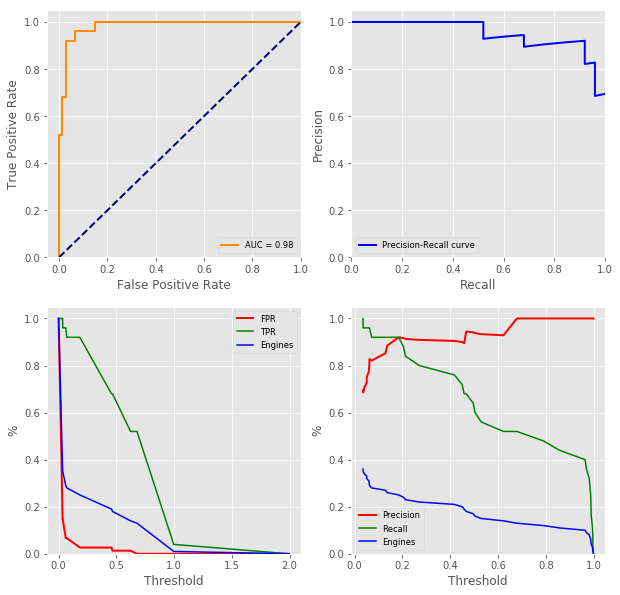

In [9]:
model = 'Logistic Regression B'
clf_lgrb = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgrb)

metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)

Engines in the above charts represent the queue or number of engines to be maintain per period, i.e. maintenance capacity.


Best Parameters:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
-----------------------------------------------------------
Logistic Regression A 

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.68      0.81        25

   micro avg       0.92      0.92      0.92       100
   macro avg       0.95      0.84      0.88       100
weighted avg       0.93      0.92      0.91       100


Metrics:
           Logistic Regression A
Accuracy                0.920000
Precision               1.000000
Recall                  0.680000
F1 Score                0.809524
ROC AUC                 0.981867

ROC Thresholds:

    Threshold  TP  F

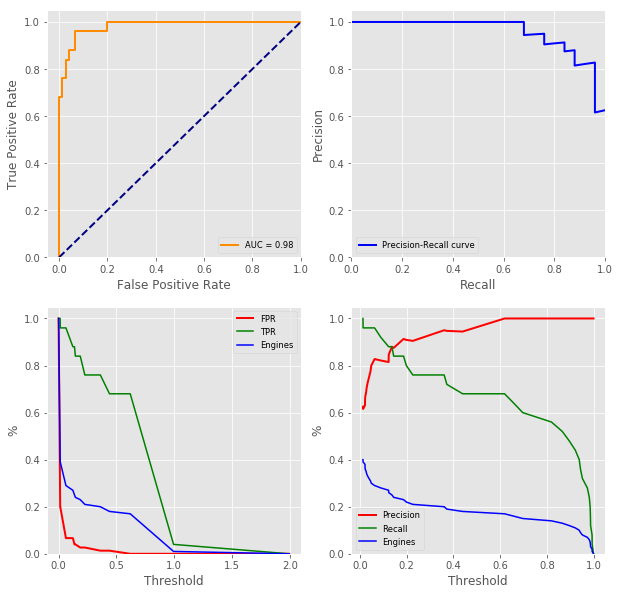

In [10]:
model = 'Logistic Regression A'
clf_lgra = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
gs_score = 'roc_auc'

clf_lgra, pred_lgra = bin_classify(model, clf_lgra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, roc_lgra, prc_lgra = bin_class_metrics(model, y_test, pred_lgra.y_pred, pred_lgra.y_score, print_out=True, plot_out=True)

In [11]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

,Logistic Regression B,Logistic Regression A
Accuracy,0.890000,0.920000
Precision,0.937500,1.000000
Recall,0.600000,0.680000
F1 Score,0.731707,0.809524
ROC AUC,0.982933,0.981867



Best Parameters:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
-----------------------------------------------------------
Decision Tree B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

   micro avg       0.88      0.88      0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Decision Tree B
Accuracy          0.880000
Precision         0.933333
Recall            0.560000
F1 Score          0.700000
ROC AUC           0.9

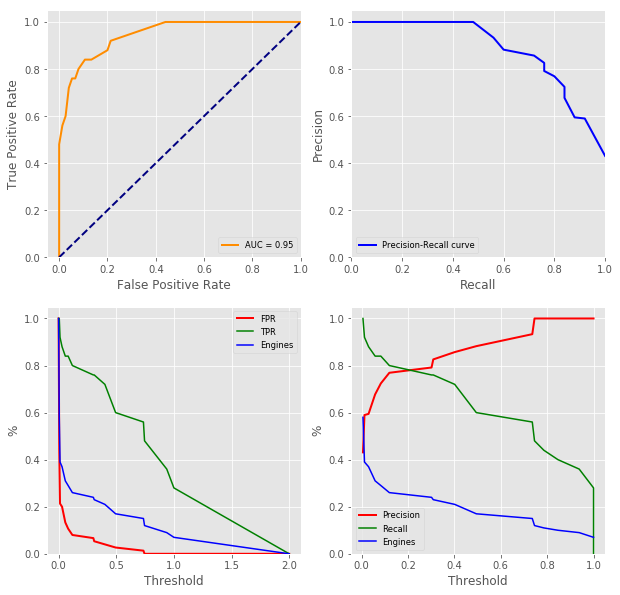

In [12]:
model = 'Decision Tree B'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, roc_dtrb, prc_dtrb = bin_class_metrics(model, y_test, pred_dtrb.y_pred, pred_dtrb.y_score, print_out=True, plot_out=True)


Best Parameters:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')
-----------------------------------------------------------
Decision Tree A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

   micro avg       0.92      0.92      0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
           Decision Tree A
Accuracy          0.920000
Precision         0.947368
Recall            0.720000
F1 Score          0.818182
ROC AUC           0.9

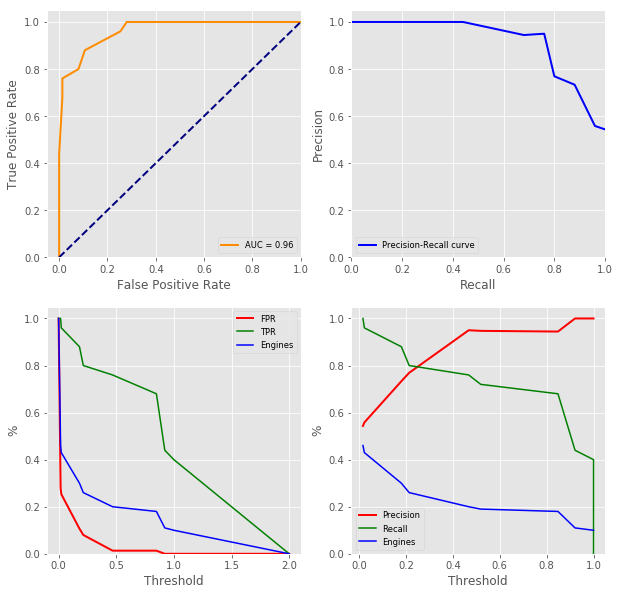

In [13]:
model = 'Decision Tree A'
clf_dtra = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtra, pred_dtra = bin_classify(model, clf_dtra, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtra)

metrics_dtra, roc_dtra, prc_dtra = bin_class_metrics(model, y_test, pred_dtra.y_pred, pred_dtra.y_score, print_out=True, plot_out=True)


In [14]:
metrics_dtr = pd.concat([metrics_dtrb, metrics_dtra], axis=1)
metrics_dtr

,Decision Tree B,Decision Tree A
Accuracy,0.880000,0.920000
Precision,0.933333,0.947368
Recall,0.560000,0.720000
F1 Score,0.700000,0.818182
ROC AUC,0.945067,0.962933



Best Parameters:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

   micro avg       0.91      0.91      0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest B
Accuracy          0.910000
Precision         0.944444
Recall       

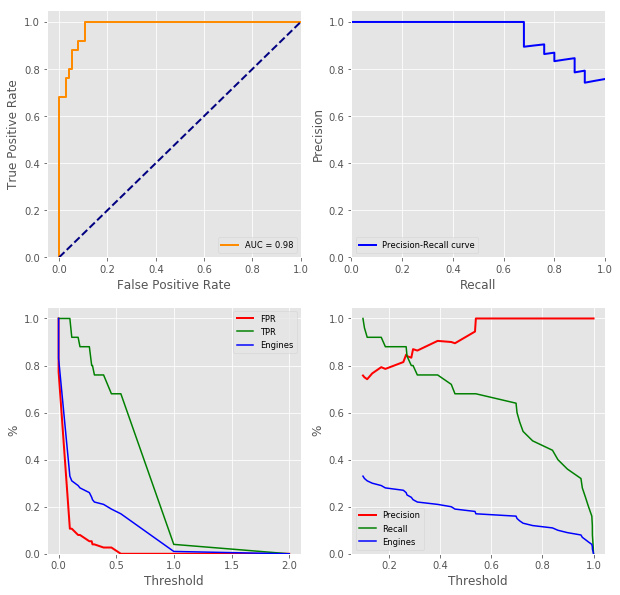

In [15]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)


Best Parameters:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
-----------------------------------------------------------
Random Forest A 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

   micro avg       0.91      0.91      0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Random Forest A
Accuracy          0.910000
Precision         0.944444
Recall       

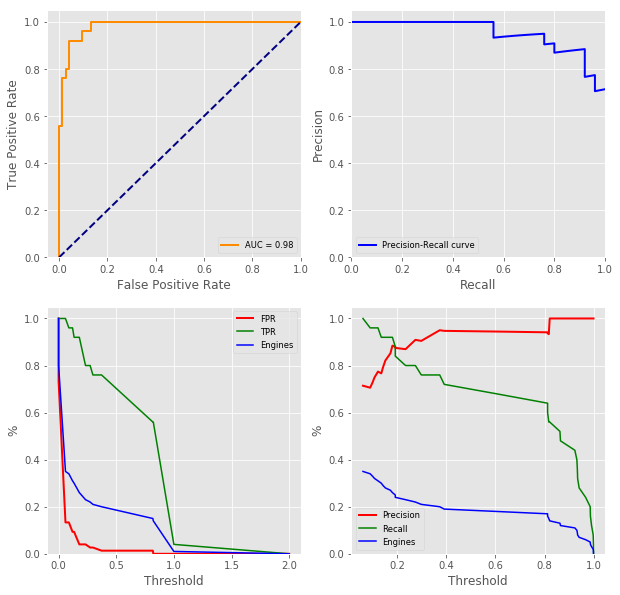

In [16]:
model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfca, pred_rfca = bin_classify(model, clf_rfca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, roc_rfca, prc_rfca = bin_class_metrics(model, y_test, pred_rfca.y_pred, pred_rfca.y_score, print_out=True, plot_out=True)

In [17]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

,Random Forest B,Random Forest A
Accuracy,0.910000,0.910000
Precision,0.944444,0.944444
Recall,0.680000,0.680000
F1 Score,0.790698,0.790698
ROC AUC,0.980267,0.982400


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Best Parameters:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------------------------------
SVC B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

   micro avg       0.91      0.91      0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              SVC B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.891733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.405108   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.0

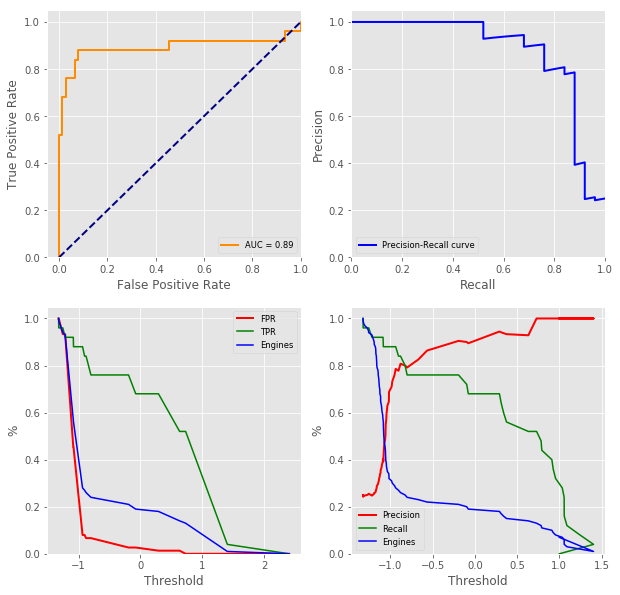

In [18]:
model = 'SVC B'
clf_svcb = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svcb, pred_svcb = bin_classify(model, clf_svcb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svcb)

metrics_svcb, roc_svcb, prc_svcb = bin_class_metrics(model, y_test, pred_svcb.y_pred, pred_svcb.y_score, print_out=True, plot_out=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Best Parameters:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False)
-----------------------------------------------------------
SVC A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

   micro avg       0.92      0.92      0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
              SVC A
Accuracy   0.920000
Precision  0.947368
Recall     0.720000
F1 Score   0.818182
ROC AUC    0.930133

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.591611   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.0

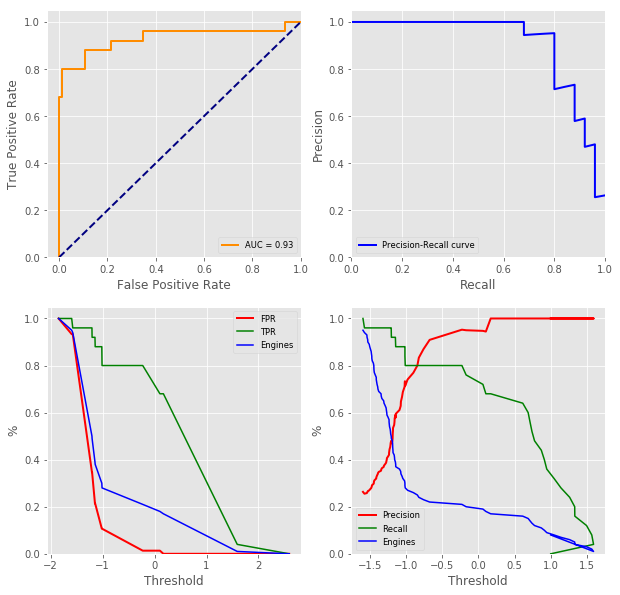

In [19]:
model = 'SVC A'
clf_svca = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svca, pred_svca = bin_classify(model, clf_svca, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svca)

metrics_svca, roc_svca, prc_svca = bin_class_metrics(model, y_test, pred_svca.y_pred, pred_svca.y_score, print_out=True, plot_out=True)

In [20]:
# Compare SVC Before and After FE
metrics_svc = pd.concat([metrics_svcb, metrics_svca], axis=1)
metrics_svc.sort_index()

,SVC B,SVC A
Accuracy,0.910000,0.920000
F1 Score,0.790698,0.818182
Precision,0.944444,0.947368
ROC AUC,0.891733,0.930133
Recall,0.680000,0.720000


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Best Parameters:
 LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)
-----------------------------------------------------------
SVC Linear B 

Confusion Matrix:
[[75  0]
 [15 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        75
           1       1.00      0.40      0.57        25

   micro avg       0.85      0.85      0.85       100
   macro avg       0.92      0.70      0.74       100
weighted avg       0.88      0.85      0.82       100


Metrics:
           SVC Linear B
Accuracy       0.850000
Precision      1.000000
Recall         0.400000
F1 Score       0.571429
ROC AUC        0.971733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    1.833338   0  25  75   0  0.00  0.000000  1.000000  0.7

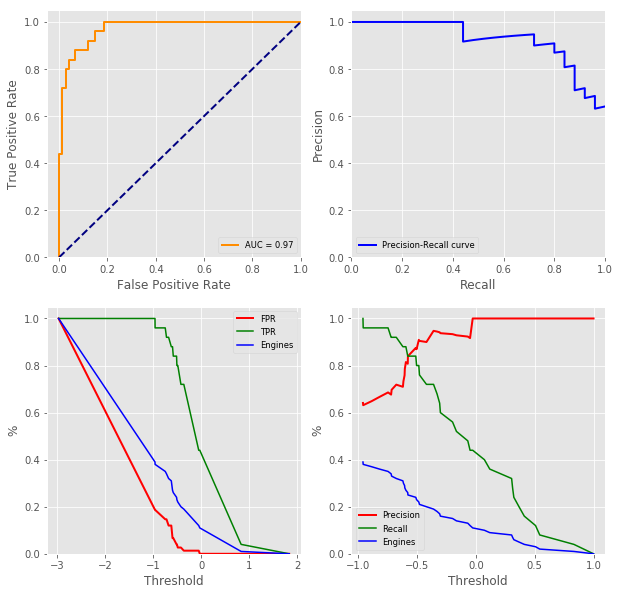

In [21]:
model = 'SVC Linear B'
clf_svlb = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svlb, pred_svlb = bin_classify(model, clf_svlb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svlb)

metrics_svlb, roc_svlb, prc_svlb = bin_class_metrics(model, y_test, pred_svlb.y_pred, pred_svlb.y_score, print_out=True, plot_out=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Best Parameters:
 LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0)
-----------------------------------------------------------
SVC Linear A 

Confusion Matrix:
[[42 33]
 [ 0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        75
           1       0.43      1.00      0.60        25

   micro avg       0.67      0.67      0.67       100
   macro avg       0.72      0.78      0.66       100
weighted avg       0.86      0.67      0.69       100


Metrics:
           SVC Linear A
Accuracy       0.670000
Precision      0.431034
Recall         1.000000
F1 Score       0.602410
ROC AUC        0.979733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.915683   0  25  75   0  0.00  0.000000  1.000000  0.

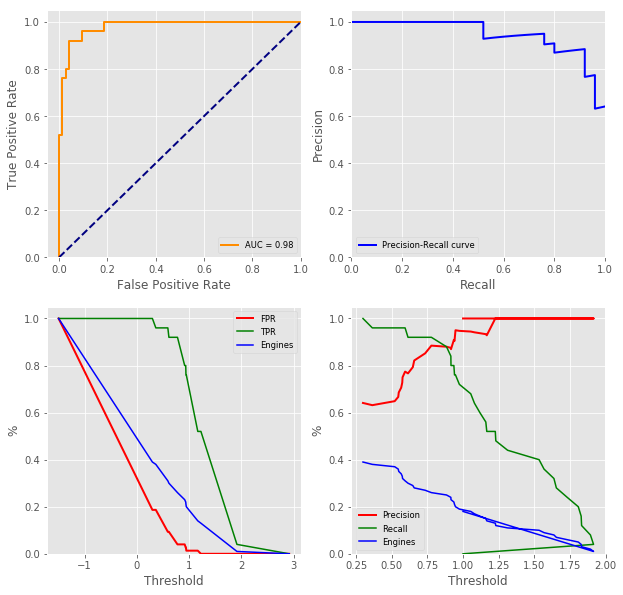

In [22]:
model = 'SVC Linear A'
clf_svla = LinearSVC(random_state=123)
gs_params = {'C': [.001, .01 ,.1 ]}
gs_score = 'roc_auc'

clf_svla, pred_svla = bin_classify(model, clf_svla, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svla)

metrics_svla, roc_svla, prc_svla = bin_class_metrics(model, y_test, pred_svla.y_pred, pred_svla.y_score, print_out=True, plot_out=True)



In [23]:
# Compare Linear SVC Before and After FE
metrics_svl = pd.concat([metrics_svlb, metrics_svla], axis=1)
metrics_svl.sort_index()

,SVC Linear B,SVC Linear A
Accuracy,0.850000,0.670000
F1 Score,0.571429,0.602410
Precision,1.000000,0.431034
ROC AUC,0.971733,0.979733
Recall,0.400000,1.000000



Best Parameters:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
           weights='uniform')
-----------------------------------------------------------
KNN B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

   micro avg       0.91      0.91      0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              KNN B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.935200

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   5  20  75   0  0.20  0.000000  1.000000  0.789474  

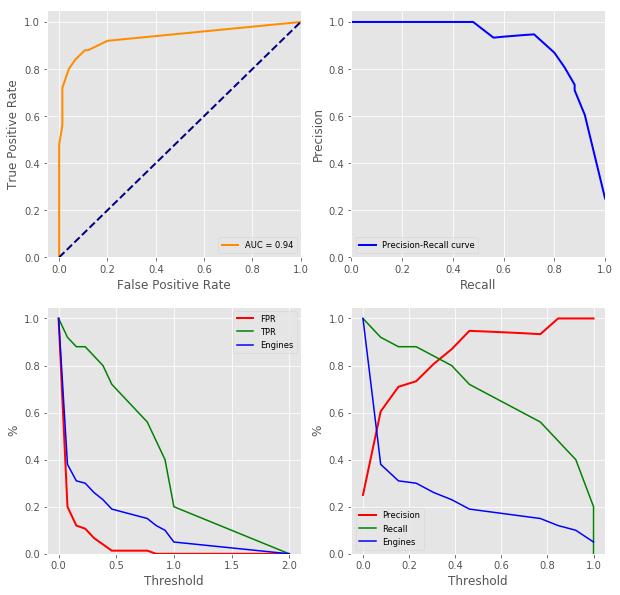

In [24]:
model = 'KNN B'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knnb, pred_knnb = bin_classify(model, clf_knnb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knnb)

metrics_knnb, roc_knnb, prc_knnb = bin_class_metrics(model, y_test, pred_knnb.y_pred, pred_knnb.y_score, print_out=True, plot_out=True)


Best Parameters:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
           weights='uniform')
-----------------------------------------------------------
KNN A 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

   micro avg       0.92      0.92      0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
              KNN A
Accuracy   0.920000
Precision  0.947368
Recall     0.720000
F1 Score   0.818182
ROC AUC    0.963467

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   8  17  75   0  0.32  0.000000  1.000000  0.815217  

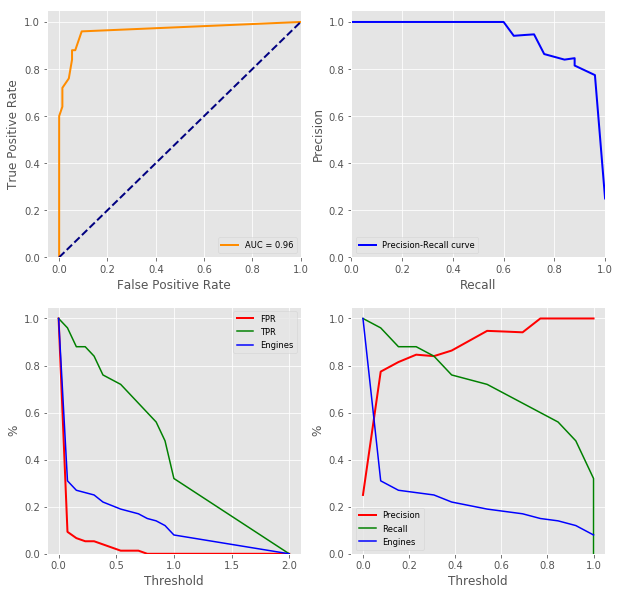

In [25]:
model = 'KNN A'
clf_knna = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9 , 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knna, pred_knna = bin_classify(model, clf_knna, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knna)

metrics_knna, roc_knna, prc_knna = bin_class_metrics(model, y_test, pred_knna.y_pred, pred_knna.y_score, print_out=True, plot_out=True)

In [26]:
# Compare KNN Before and After FE
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn.sort_index()

,KNN B,KNN A
Accuracy,0.910000,0.920000
F1 Score,0.790698,0.818182
Precision,0.944444,0.947368
ROC AUC,0.935200,0.963467
Recall,0.680000,0.720000



Best Parameters:
 GaussianNB(priors=None, var_smoothing=1e-09)
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

   micro avg       0.94      0.94      0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB B
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.987733

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00   8  17  75   0  0.32  0.000000  1.000000  0.815217  0.08
2   1.000000e+00  17   8  75   0  0.68  0.000000  1.000000  0.903614 

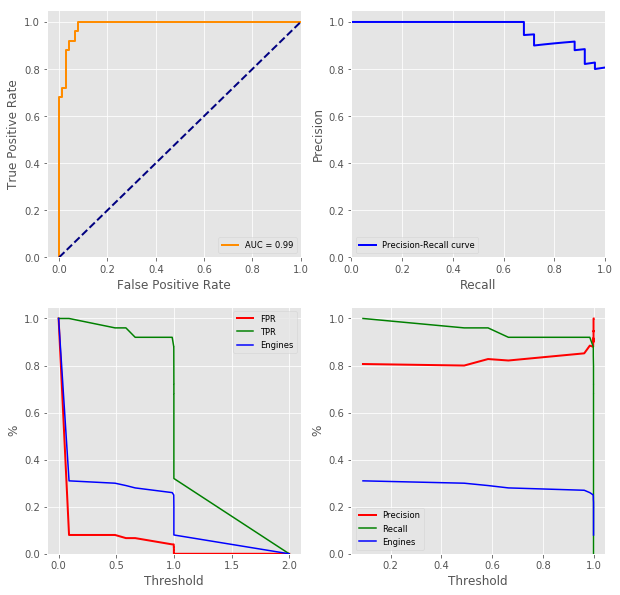

In [27]:
model = 'Gaussian NB B'
clf_gnbb = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, features_orig, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, pred_gnbb.y_score, print_out=True, plot_out=True)


Best Parameters:
 GaussianNB(priors=None, var_smoothing=1e-09)
-----------------------------------------------------------
Gaussian NB A 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.83      0.96      0.89        25

   micro avg       0.94      0.94      0.94       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.95      0.94      0.94       100


Metrics:
           Gaussian NB A
Accuracy        0.940000
Precision       0.827586
Recall          0.960000
F1 Score        0.888889
ROC AUC         0.980533

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00  17   8  74   1  0.68  0.013333  0.986667  0.902439  0.18
2   1.000000e+00  20   5  74   1  0.80  0.013333  0.986667  0.936709 

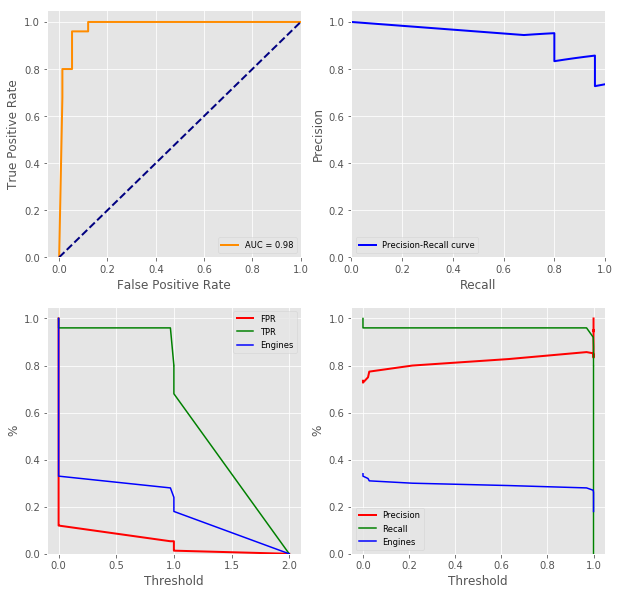

In [28]:
model = 'Gaussian NB A'
clf_gnba = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnba, pred_gnba = bin_classify(model, clf_gnba, features_extr, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnba)

metrics_gnba, roc_gnba, prc_gnba = bin_class_metrics(model, y_test, pred_gnba.y_pred, pred_gnba.y_score, print_out=True, plot_out=True)


In [29]:
# Compare Naive Bayes Before and After FE
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb.sort_index()

,Gaussian NB B,Gaussian NB A
Accuracy,0.940000,0.940000
F1 Score,0.888889,0.888889
Precision,0.827586,0.827586
ROC AUC,0.987733,0.980533
Recall,0.960000,0.960000


#### Compare all binary classification algorithms tested

In [30]:
#compare all models
metrics_bn = pd.concat([metrics_lgr, metrics_dtr, metrics_rfc, metrics_svc, metrics_svl, metrics_knn, metrics_gnb], axis=1)
metrics_bn

,Logistic Regression B,Logistic Regression A,Decision Tree B,Decision Tree A,Random Forest B,Random Forest A,SVC B,SVC A,SVC Linear B,SVC Linear A,KNN B,KNN A,Gaussian NB B,Gaussian NB A
Accuracy,0.890000,0.920000,0.880000,0.920000,0.910000,0.910000,0.910000,0.920000,0.850000,0.670000,0.910000,0.920000,0.940000,0.940000
Precision,0.937500,1.000000,0.933333,0.947368,0.944444,0.944444,0.944444,0.947368,1.000000,0.431034,0.944444,0.947368,0.827586,0.827586
Recall,0.600000,0.680000,0.560000,0.720000,0.680000,0.680000,0.680000,0.720000,0.400000,1.000000,0.680000,0.720000,0.960000,0.960000
F1 Score,0.731707,0.809524,0.700000,0.818182,0.790698,0.790698,0.790698,0.818182,0.571429,0.602410,0.790698,0.818182,0.888889,0.888889
ROC AUC,0.982933,0.981867,0.945067,0.962933,0.980267,0.982400,0.891733,0.930133,0.971733,0.979733,0.935200,0.963467,0.987733,0.980533


Naïve Bayes and Random Forests scored best AUC ROC. It also noticed that feature extraction has improved most models performance metrics.  

Let us compare the AUC ROC and Precision-Recall curves as well

Text(0.5, 1.0, 'Precision Recall Curve')

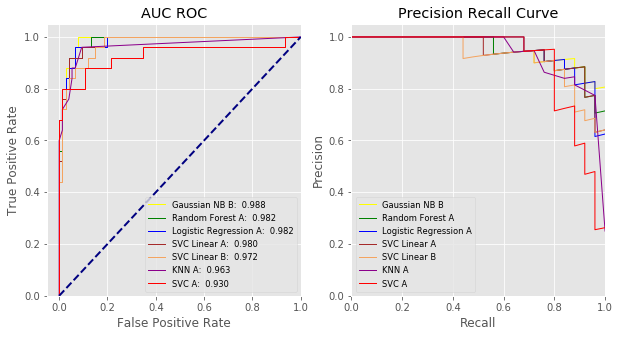

In [31]:
# Plot AUC-ROC and precision-recall curves for best models

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_gnbb.FPR, roc_gnbb.TPR, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0] + ':  %.3f' % metrics_gnbb.at['ROC AUC', metrics_gnbb.columns.values.tolist()[0]])
ax1.plot(roc_rfca.FPR, roc_rfca.TPR, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0] + ':  %.3f' % metrics_rfca.at['ROC AUC', metrics_rfca.columns.values.tolist()[0]])
ax1.plot(roc_lgra.FPR, roc_lgra.TPR, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0] + ':  %.3f' % metrics_lgra.at['ROC AUC', metrics_lgra.columns.values.tolist()[0]])
ax1.plot(roc_svla.FPR, roc_svla.TPR, color='brown', lw=1, label= metrics_svla.columns.values.tolist()[0] + ':  %.3f' % metrics_svla.at['ROC AUC', metrics_svla.columns.values.tolist()[0]])
ax1.plot(roc_svlb.FPR, roc_svlb.TPR, color='sandybrown', lw=1, label= metrics_svlb.columns.values.tolist()[0] + ':  %.3f' % metrics_svlb.at['ROC AUC', metrics_svlb.columns.values.tolist()[0]])
ax1.plot(roc_knna.FPR, roc_knna.TPR, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0] + ':  %.3f' % metrics_knna.at['ROC AUC', metrics_knna.columns.values.tolist()[0]])
ax1.plot(roc_svca.FPR, roc_svca.TPR, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0] + ':  %.3f' % metrics_svca.at['ROC AUC', metrics_svca.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('AUC ROC')

ax2.plot(prc_gnbb.Recall, prc_gnbb.Precision, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0])
ax2.plot(prc_rfca.Recall, prc_rfca.Precision, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0])
ax2.plot(prc_lgra.Recall, prc_lgra.Precision, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0])
ax2.plot(prc_svla.Recall, prc_svla.Precision, color='brown', lw=1, label= metrics_svla.columns.values.tolist()[0])
ax2.plot(prc_svlb.Recall, prc_svlb.Precision, color='sandybrown', lw=1, label= metrics_svlb.columns.values.tolist()[0])
ax2.plot(prc_knna.Recall, prc_knna.Precision, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0])
ax2.plot(prc_svca.Recall, prc_svca.Precision, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('Precision Recall Curve')
        

__Binary Classification Summary:__  

* Most of the binary classifiers showed better performance metrics with the addition of new features.  
* Random Forest and Naive Bayes showed same performance before and after feature engineering.  
* Naive Bayes and Linear SVC (with new features) scored better than other classifiers in Recall (Sensitivity) while others scored better in Precision. 
* Linear SVC has totally different scoring metrics before and after FE, switching between Precision and Recall !!  
* Although SVC (rbf) has the lowest AUC-ROC, it has the best precision-recall curve operating at threshold 0.17, giving  %100 precision and %68 recall, targeting %17 of the engines
* The graphs for TPR, FPR, and Engines should be linked to cost matrix of (TP, FP, TN, FN) to calculate the expected value at different operating points (thresholds) to help optimizing business decisions.





### Expected Value Calculation:

Based on the book: [Data Science for Business](https://www.amazon.com/Data-Science-Business-Data-Analytic-Thinking/dp/1449361323), Expected Value is a method to compare different classification models by constructing cost-benefit matrix in line with the confusion matrix, and then convert model performance to a single monetary value by multiplying confusion matrix into the cost-benefit matrix.  

#### _Expected Profit = Prop(+ve) x [TPR x benefit(TP) + FNR x cost(FN)] + Prob(-ve) x [TNR x benefit(TN) + FPR x cost(FP)] _

Cost-benefit matrix should be designed by domain expert. Let us assume the following:  

- True Positive (TP) has benefit of USD 300K:  engines that need maintenance and correctly selected by the model.  
- True Negative (TN) has benefit of USD 0K: engines that are OK and not selected by the model.
- False Positive (FP) has cost of USD -100K: engines that are OK but selected by the model.
- False Negative (FN) has cost of USD -200K: engines that need maintenance but not selected by the model.

No. of positive class instances in the test data = 25  
No. of negative class instances in the test data = 75

In [32]:
TPb = 300
TNb = 2
FPc = -100
FNc = -200

prob_positive = 0.25 
prop_negative = 0.75


In [33]:
# calculate the max profit in each model using roc dataframes generated earlier during model training

df_max_profit = pd.DataFrame()

roc_dfs = [roc_lgrb, roc_lgra, roc_dtrb, roc_dtra, roc_rfcb, roc_rfca, roc_svcb, roc_svca, roc_svlb, roc_svla, roc_knnb, roc_knna, roc_gnbb, roc_gnba]

for df in roc_dfs:
    df['Profit'] = prob_positive*(df.TPR*TPb + df.FNR*FNc) + prop_negative*(df.TNR*TNb + df.FPR*FPc)
    df_max = df[df.Profit == df.Profit.max()]
    df_max_profit = pd.concat([df_max_profit,df_max], ignore_index=True)
    
colnames = ['Profit', 'Model', 'Que', 'Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR', 'FNR']

# sort results by Profit
df_max_profit = df_max_profit[colnames].sort_values(by='Profit', ascending=False).reset_index(drop=True)
df_max_profit



,Profit,Model,Que,Threshold,TP,FP,TN,FN,TPR,FPR,TNR,FNR
0,20.380000,Gaussian NB B,0.31,0.090529,25,0,69,6,1.00,0.080000,0.920000,1.000000
1,20.114444,Gaussian NB A,0.28,0.969744,24,1,71,4,0.96,0.053333,0.946667,0.986111
2,19.793333,Logistic Regression B,0.25,0.184254,23,2,73,2,0.92,0.026667,0.973333,0.973333
3,19.104225,Logistic Regression A,0.29,0.063362,24,1,70,5,0.96,0.066667,0.933333,0.985915
4,18.791351,Random Forest A,0.26,0.179746,23,2,72,3,0.92,0.040000,0.960000,0.972973
5,18.791351,SVC Linear A,0.26,0.777863,23,2,72,3,0.92,0.040000,0.960000,0.972973
6,18.340000,Random Forest B,0.33,0.097536,25,0,67,8,1.00,0.106667,0.893333,1.000000
7,17.084638,KNN A,0.31,0.076923,24,1,68,7,0.96,0.093333,0.906667,0.985507
8,14.454795,SVC Linear B,0.27,-0.594239,22,3,70,5,0.88,0.066667,0.933333,0.958904
9,13.644557,SVC A,0.21,-0.227728,20,5,74,1,0.80,0.013333,0.986667,0.936709



Gaussian Naieve Bayes has the best profit per engine (USD 19K per engine) if the company has the capacity to maintain %31 of the engines per period (Queue).

For constrained business capacity, the same method could be applied:



In [34]:
# sort the results by Que (capacity) and Profit

df_max_profit = df_max_profit[colnames].sort_values(by=['Que', 'Profit'], ascending=[True, False]).reset_index(drop=True)
df_max_profit


,Profit,Model,Que,Threshold,TP,FP,TN,FN,TPR,FPR,TNR,FNR
0,13.644557,SVC A,0.21,-0.227728,20,5,74,1,0.80,0.013333,0.986667,0.936709
1,19.793333,Logistic Regression B,0.25,0.184254,23,2,73,2,0.92,0.026667,0.973333,0.973333
2,18.791351,Random Forest A,0.26,0.179746,23,2,72,3,0.92,0.040000,0.960000,0.972973
3,18.791351,SVC Linear A,0.26,0.777863,23,2,72,3,0.92,0.040000,0.960000,0.972973
4,12.102703,KNN B,0.26,0.307692,21,4,70,5,0.84,0.066667,0.933333,0.945946
5,14.454795,SVC Linear B,0.27,-0.594239,22,3,70,5,0.88,0.066667,0.933333,0.958904
6,20.114444,Gaussian NB A,0.28,0.969744,24,1,71,4,0.96,0.053333,0.946667,0.986111
7,13.463333,SVC B,0.28,-0.935790,22,3,69,6,0.88,0.080000,0.920000,0.958333
8,19.104225,Logistic Regression A,0.29,0.063362,24,1,70,5,0.96,0.066667,0.933333,0.985915
9,9.156901,Decision Tree B,0.29,0.082857,21,4,67,8,0.84,0.106667,0.893333,0.943662


For constrained operations:

- Working at capacity of %26: Best proft per engine is USD 17.35 (Random Forest A or SVC Linear A)
- Working at capacity of %28: Best profit per engine is USD 18.69 (Logistic Regression B or Gaussian NB A)


__Summary:__  

With the use of __Expected Value__ method to calculate business gain in monetary units, we were able to compare different classification models and support decision-making in different operating conditions.
